# **Bagging & Boosting, KNN & Stacking**

#**Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer:**

Ensemble techniques combine multiple base models to obtain better predictive performance than any single model. Bagging trains models in parallel on bootstrapped samples and averages (or votes) their predictions to reduce variance. Boosting trains models sequentially, where each learner focuses on correcting errors of previous learners, aiming to reduce bias and improve accuracy.

#**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Answer:**

Random Forest builds many decision trees on different bootstrap samples and averages their outputs, which reduces variance. It also selects a random subset of features at each split to decorrelate trees. Two key hyperparameters: `n_estimators` (number of trees; more trees typically lower variance) and `max_features` (number of features considered at each split; smaller values increase diversity and reduce overfitting).

#**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer:**

Stacking trains multiple base (level-0) models and then trains a meta (level-1) model on the base models' predictions. Unlike bagging (parallel homogeneous models) and boosting (sequential correction), stacking uses heterogeneous models and learns how to combine them, often improving robustness. Example: use RandomForest, SVM, and KNN as base learners; train a Logistic Regression meta-learner on their validation predictions.

#**Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer:**

OOB (Out-Of-Bag) score is the performance estimate obtained by predicting each training sample using only the trees that did not include that sample in their bootstrap training set. It provides a built-in cross-validation-like estimate without needing a separate validation set, thus saving data and offering an unbiased assessment of generalization.

#**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**

- How they handle errors from weak learners
- Weight adjustment mechanism
- Typical use cases**

**Answer:**

- **AdaBoost:** Increases weights on misclassified instances so subsequent learners focus on them; combines learners via weighted voting. Good for relatively clean binary classification using simple base learners.
- **Gradient Boosting:** Fits each new learner to the negative gradient (residual) of the loss function (implicit error correction); uses learning rate and shrinkage. Widely used for high-performance tabular tasks (XGBoost, LightGBM, CatBoost).

#**Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer:**

CatBoost uses ordered target statistics and random permutations to encode categorical features without target leakage, and applies combinations of categorical features. Its specialized encoding and gradient boosting implementation reduce preprocessing needs and improve performance on categorical-heavy datasets.

#**Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization**

In [1]:
# Q7: KNN on Wine dataset - unscaled vs scaled, GridSearchCV optimization
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

data = load_wine()
X = data.data
y = data.target

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 1) Unscaled KNN (k=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
pred_unscaled = knn_unscaled.predict(X_test)
print('Unscaled KNN accuracy:', accuracy_score(y_test, pred_unscaled))
print('Classification report (unscaled):\\n', classification_report(y_test, pred_unscaled, target_names=data.target_names))

# 2) Scaled KNN
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
pred_scaled = knn_scaled.predict(X_test_s)
print('Scaled KNN accuracy:', accuracy_score(y_test, pred_scaled))
print('Classification report (scaled):\\n', classification_report(y_test, pred_scaled, target_names=data.target_names))

# 3) GridSearchCV for best K and p (1 or 2)
param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['minkowski'], 'p': [1,2]}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(scaler.transform(X), y)  # grid search on full scaled data
print('Best params from GridSearchCV:', gs.best_params_)
best_knn = gs.best_estimator_

# Evaluate best model on our hold-out test set
best_pred = best_knn.predict(X_test_s)
print('Optimized KNN accuracy on test set:', accuracy_score(y_test, best_pred))
print('Classification report (optimized):\\n', classification_report(y_test, best_pred, target_names=data.target_names))

Unscaled KNN accuracy: 0.7222222222222222
Classification report (unscaled):\n               precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled KNN accuracy: 0.9444444444444444
Classification report (scaled):\n               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params from GridSearchCV: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1}
Opti

#**Question 8: PCA + KNN with Variance Analysis and Visualization**

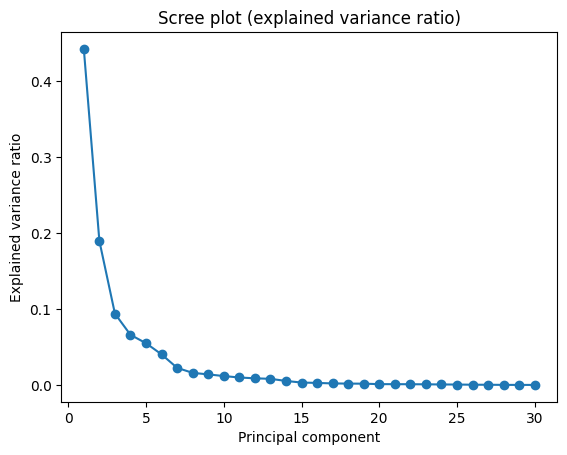

Number of components to retain 95% variance: 10
KNN accuracy on original data: 0.972027972027972
KNN accuracy on PCA-transformed data (95% var): 0.965034965034965


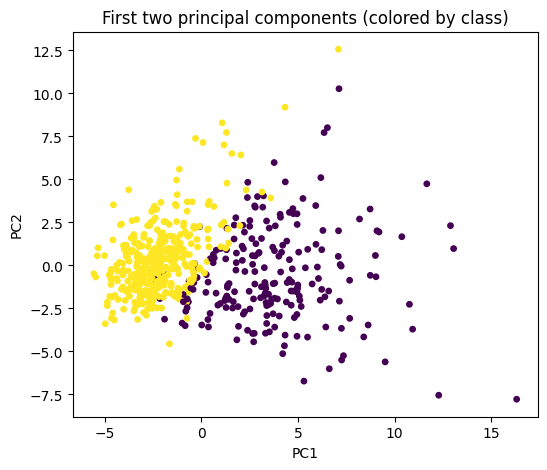

In [2]:
# Q8: PCA + KNN on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Standardize
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Scree plot
pca_full = PCA().fit(X_s)
explained_ratio = pca_full.explained_variance_ratio_
plt.figure()
plt.plot(np.arange(1, len(explained_ratio)+1), explained_ratio, marker='o')
plt.title('Scree plot (explained variance ratio)')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

# Retain 95% variance
pca95 = PCA(n_components=0.95)
X_pca = pca95.fit_transform(X_s)
print('Number of components to retain 95% variance:', X_pca.shape[1])

# Train/test and compare KNN
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.25, random_state=42, stratify=y)
X_pca_full = pca95.fit_transform(X_s)
Xtr_pca, Xte_pca, ytr, yte = train_test_split(X_pca_full, y, test_size=0.25, random_state=42, stratify=y)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
knn_pca.fit(Xtr_pca, ytr)

pred_orig = knn_orig.predict(X_test)
pred_pca = knn_pca.predict(Xte_pca)

print('KNN accuracy on original data:', accuracy_score(y_test, pred_orig))
print('KNN accuracy on PCA-transformed data (95% var):', accuracy_score(yte, pred_pca))

# Scatter plot of first two PCs
pca2 = PCA(n_components=2)
X_2pc = pca2.fit_transform(X_s)
plt.figure(figsize=(6,5))
plt.scatter(X_2pc[:,0], X_2pc[:,1], c=y, cmap='viridis', s=15)
plt.title('First two principal components (colored by class)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#**Question 9: KNN Regressor with Distance Metrics and K-Value Analysis**

MSE (Euclidean, K=5): 4521.773307890813
MSE (Manhattan, K=5): 5174.885164809207


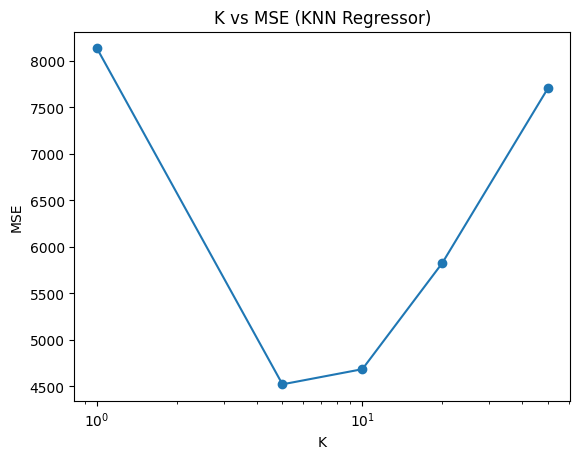

In [3]:
# Q9: KNN Regressor - compare Euclidean and Manhattan, and K vs MSE
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=10, noise=5.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) K=5 Euclidean and Manhattan
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_euc.fit(X_train, y_train)
knn_man.fit(X_train, y_train)
pred_euc = knn_euc.predict(X_test)
pred_man = knn_man.predict(X_test)
mse_euc = mean_squared_error(y_test, pred_euc)
mse_man = mean_squared_error(y_test, pred_man)
print('MSE (Euclidean, K=5):', mse_euc)
print('MSE (Manhattan, K=5):', mse_man)

# b) K values
Ks = [1,5,10,20,50]
mses = []
for k in Ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mses.append(mean_squared_error(y_test, pred))

plt.figure()
plt.plot(Ks, mses, marker='o')
plt.title('K vs MSE (KNN Regressor)')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

#**Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data**


Top features by importance:\n Glucose                     0.233786
Insulin                     0.155369
BMI                         0.146590
Age                         0.114685
DiabetesPedigreeFunction    0.107881
dtype: float64
Results (algorithm: train_time sec, accuracy):
brute {'train_time': 0.0019807815551757812, 'accuracy': 0.6770833333333334}
kd_tree {'train_time': 0.0022530555725097656, 'accuracy': 0.6770833333333334}
ball_tree {'train_time': 0.0031747817993164062, 'accuracy': 0.6770833333333334}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


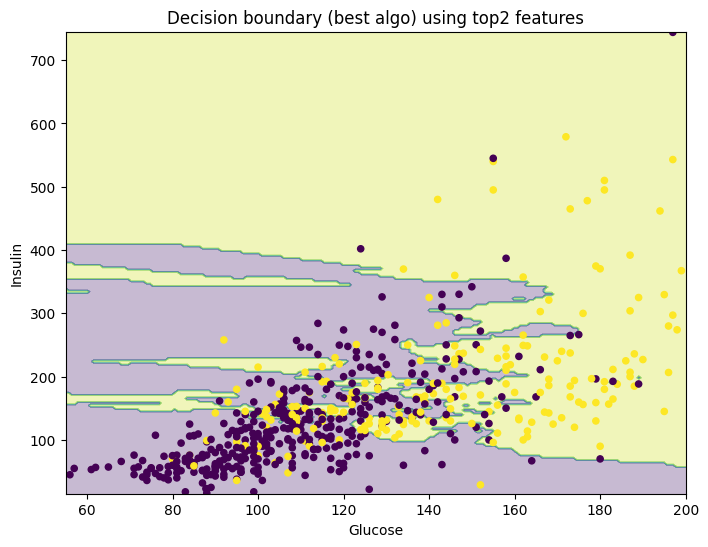

In [4]:
# Q10: KNNImputer + compare algorithms on Pima Diabetes dataset
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

# Replace zeros with NaN for specific columns
cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols_with_zero_missing:
    if c in df.columns:
        df[c] = df[c].replace(0, np.nan)

# Impute
imputer = KNNImputer(n_neighbors=5)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Feature importance for top2 features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Top features by importance:\\n', importances.head())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42, stratify=y)

results = {}
for algo in ['brute', 'kd_tree', 'ball_tree']:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    train_time = t1 - t0
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[algo] = {'train_time': train_time, 'accuracy': acc}

print('Results (algorithm: train_time sec, accuracy):')
for k,v in results.items():
    print(k, v)

# Decision boundary for best algorithm (using top2 features)
best_algo = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
top2 = importances.index[:2].tolist()
clf_2 = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
clf_2.fit(X_train[top2], y_train)

# Plot decision boundary
x_min, x_max = X_train[top2[0]].min() - 1, X_train[top2[0]].max() + 1
y_min, y_max = X_train[top2[1]].min() - 1, X_train[top2[1]].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf_2.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[top2[0]], X_train[top2[1]], c=y_train, s=20)
plt.title('Decision boundary (best algo) using top2 features')
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.show()

----

Notebook generated by ChatGPT. All questions are in **bold** and in separate cells with corresponding answers. Practical code cells are runnable in Colab; run them there to see outputs.